In [1]:
import numpy as np
import sympy as s

In [4]:
from sympy import init_printing
init_printing(use_latex = True)

In [9]:
x , nu , t = s.symbols('x nu t')
phi = (s.exp(-(x - 4*t)**2/(4 * nu * (t + 1)))) + (s.exp(-(x - 4*t - 2*s.pi)**2/(4 * nu * (t + 1))))
phi

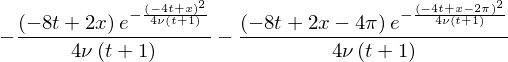

In [10]:
phiprime = phi.diff(x)
phiprime

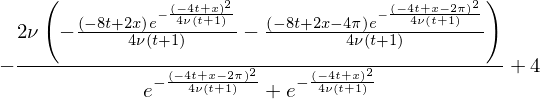

In [11]:
from sympy.utilities.lambdify import lambdify
u = (-2 * nu/phi) * phiprime + 4
u

In [12]:
ufunc = lambdify((t , x , nu) , u)
print(ufunc(1 , 4 , 3))

3.49170664206445


In [13]:
from matplotlib import pylab
nx = 200
nt = 200
dx = 2*np.pi/(nx - 1)
nu = 0.07
dt = dx * nu

x = np.linspace(0 , 2 * np.pi , nx)
un = np.empty(nx)
t = 0
u = np.asarray([ufunc(t , x0 , nu) for x0 in x])
u

array([4.        , 4.0315738 , 4.06314759, 4.09472139, 4.12629518,
       4.15786898, 4.18944277, 4.22101657, 4.25259036, 4.28416416,
       4.31573796, 4.34731175, 4.37888555, 4.41045934, 4.44203314,
       4.47360693, 4.50518073, 4.53675452, 4.56832832, 4.59990211,
       4.63147591, 4.66304971, 4.6946235 , 4.7261973 , 4.75777109,
       4.78934489, 4.82091868, 4.85249248, 4.88406627, 4.91564007,
       4.94721387, 4.97878766, 5.01036146, 5.04193525, 5.07350905,
       5.10508284, 5.13665664, 5.16823043, 5.19980423, 5.23137803,
       5.26295182, 5.29452562, 5.32609941, 5.35767321, 5.389247  ,
       5.4208208 , 5.45239459, 5.48396839, 5.51554218, 5.54711598,
       5.57868978, 5.61026357, 5.64183737, 5.67341116, 5.70498496,
       5.73655875, 5.76813255, 5.79970634, 5.83128014, 5.86285394,
       5.89442773, 5.92600153, 5.95757532, 5.98914912, 6.02072291,
       6.05229671, 6.0838705 , 6.1154443 , 6.14701809, 6.17859189,
       6.21016569, 6.24173948, 6.27331328, 6.30488707, 6.33646

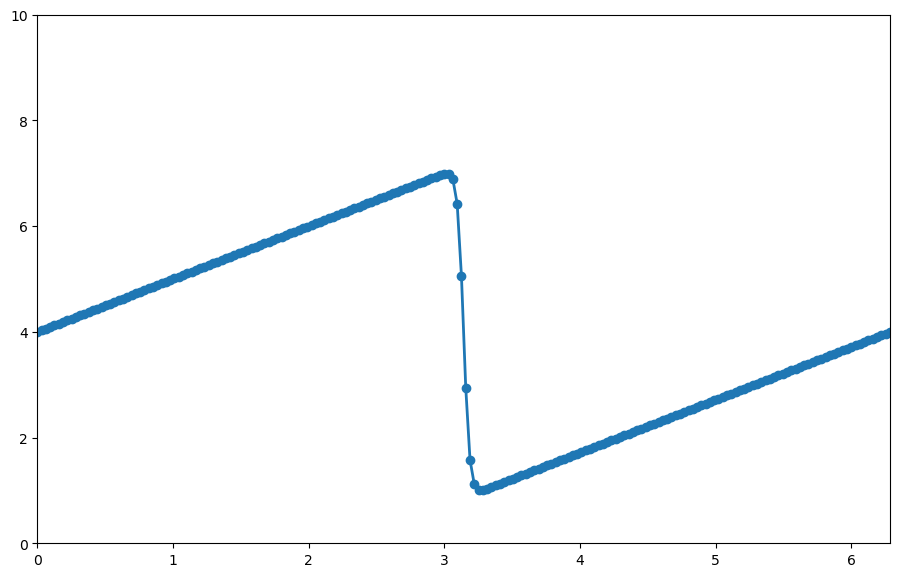

In [17]:
from matplotlib import pyplot
pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.plot(x, u, marker='o', lw=2)
pyplot.xlim([0, 2 * np.pi])
pyplot.ylim([0, 10]);

In [19]:
for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + nu * dt / dx**2 *\
                (un[i+1] - 2 * un[i] + un[i-1])
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 *\
                (un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0]
        
u_analytical = np.asarray([ufunc(nt * dt, xi, nu) for xi in x])

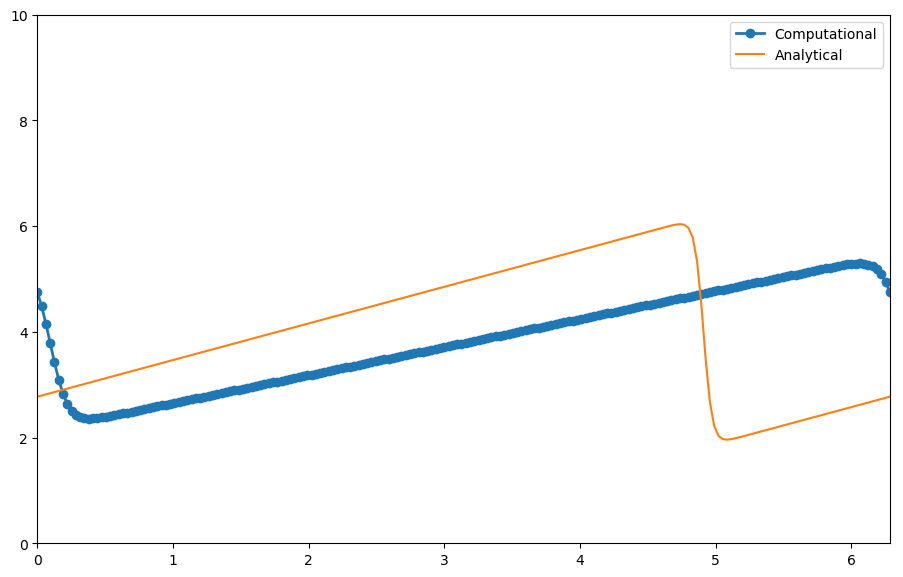

In [21]:
pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.plot(x,u, marker='o', lw=2, label='Computational')
pyplot.plot(x, u_analytical, label='Analytical')
pyplot.xlim([0, 2 * np.pi])
pyplot.ylim([0, 10])
pyplot.legend();